In [2]:
import pandas as pd
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import json
import pickle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
config_path = "configs/base_config.json"
with open(config_path) as f:
    config = json.load(f)

In [ ]:
with open(config['paths']['topic_modeling_feature_vector_path'], 'rb') as handle:
    feature_vector = pickle.load(handle)

In [ ]:
df = pd.read_csv(config['paths']['all_data_path'])

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

# Number of features
features = [ 'kinkade',
 'word_count',
 'char_count',
 'median_word_length',
 'avg_word_length',
 'skew_word_length',
 'characters_per_word',
 'syll_per_word',
 'words_per_sentence',
 'sentences_per_paragraph',
 'type_token_ratio',
 'syllables',
 'sentences',
 'long_words',
 'complex_words']

# Map 0 and 1 to 'female' and 'male'
df['gender'] = df['one_if_male'].map({0: 'female', 1: 'male'})

# Number of features
# Setting up the grid size
nrows = 5
ncols = 3

# Creating subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each feature in the grid
for i, feature in enumerate(features):
    df.boxplot(column=feature, by='gender', ax=axes[i], showfliers=False)
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and add overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Gender-Based Analysis of Textual Characteristics', fontsize=16)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Number of features
features = [
 'kinkade',
 'word_count',
 'char_count',
 'median_word_length',
 'avg_word_length',
 'skew_word_length',
 'characters_per_word',
 'syll_per_word',
 'words_per_sentence',
 'sentences_per_paragraph',
 'type_token_ratio',
 'syllables',
 'sentences',
 'long_words',
 'complex_words']

# Map 0 and 1 to 'female' and 'male'
df['gender'] = df['one_if_male'].map({0: 'female', 1: 'male'})

# Number of features
# Setting up the grid size
nrows = 5
ncols = 3

# Creating subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each feature in the grid
for i, feature in enumerate(features):
    df.boxplot(column=feature, by='gender', ax=axes[i], showfliers=False)
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    
    # Calculate medians
    medians = df.groupby('gender')[feature].median()
    
    # Annotate medians
    for gender in medians.index:
        median_val = medians[gender]
        x = 1 if gender == 'female' else 2
        axes[i].text(x, median_val, f'{median_val:.2f}', horizontalalignment='center')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and add overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Gender-Based Analysis of Textual Characteristics', fontsize=16)

plt.show()


In [ ]:
'Parent_Catgeory' in feature_vector

In [ ]:
df = pd.read_csv('data/df_with_topic_features.csv')

In [ ]:
df.head()

In [ ]:
df['Parent_Catgeory'].value_counts()

In [ ]:
df_cat = df[df['Parent_Catgeory'] == 'Mech_Engr']

In [ ]:
# RF
target = df_cat['one_if_male']
# Step 1: Perform undersampling
undersampler = RandomUnderSampler(random_state=config['random_state'])

X_resampled, y_resampled = undersampler.fit_resample(df_cat[feature_vector], target)

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=config['test_size'],
                                                    random_state=config['random_state'])

# Step 3: Train a random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 5: Evaluate the performance of the model
print(classification_report(y_test, y_pred))

In [ ]:
df = df[['Parent_Catgeory', 'uspc_class']]

In [ ]:
df = df[df['Parent_Catgeory'].isin(["Mech_Engr", "Trans"])]

In [ ]:
df.head()

In [ ]:
category_counts = df.groupby('uspc_class')['Parent_Catgeory'].nunique().reset_index()
category_counts

In [ ]:
len(category_counts[category_counts['Parent_Catgeory'] > 1])

In [ ]:
len(category_counts)

In [ ]:
min_val = 0
for uspc_class in tqdm(df['uspc_class'].unique()):
    min_val += df[df['uspc_class'] == uspc_class]['Parent_Catgeory'].value_counts().min()

In [ ]:
min_val

In [ ]:
min_val / len(df)

In [ ]:
df = pd.read_csv('data/df_with_topic_features.csv')

In [ ]:
df.shap

In [ ]:
list(df)

In [ ]:
df = pd.read_csv(config['paths']['data_with_clusters_tf_idf_path'])

In [ ]:
df = df[df['one_if_pending'] == 0]

In [ ]:
df.head()

In [ ]:
# Settings
women_thresholds = list(range(40, 91, 10))
rejection_thresholds = list(range(40, 91, 10))

# Prepare plot data
plot_data = pd.DataFrame(index=rejection_thresholds, columns=women_thresholds)

for women_thresh in women_thresholds:
    # Calculate clusters with at least women_thresh% women
    clusters_with_women = df.groupby('Cluster').apply(
        lambda x: pd.Series({
            'percent_women': (x['one_if_male'] == 0).mean() * 100,
            'percent_rejects': (x['one_if_patented'] == 0).mean() * 100
        })
    ).query(f'percent_women >= {women_thresh}')

    # Evaluate clusters based on varying rejection thresholds
    for rejection_thresh in rejection_thresholds:
        qualified_clusters = clusters_with_women[clusters_with_women['percent_rejects'] >= rejection_thresh]
        plot_data.loc[rejection_thresh, women_thresh] = len(qualified_clusters)

# Plotting
plt.figure(figsize=(12, 8))
for col in plot_data.columns:
    plt.plot(plot_data.index, plot_data[col], label=f'At least {col}% women')

plt.xlabel('Minimum % of Rejections')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters by Women Percentage and Rejection Thresholds')
plt.legend(title='Women % Threshold')
plt.grid(True)
plt.show()

In [ ]:
# Prepare DataFrame to hold the number of rows per cluster for each threshold
results_df = pd.DataFrame()

# Calculate cluster metrics
cluster_metrics = df.groupby('Cluster').apply(
    lambda x: pd.Series({
        'percent_women': (x['one_if_male'] == 0).mean() * 100,
        'percent_rejects': (x['one_if_patented'] == 0).mean() * 100,
        'total_rows': len(x)
    })
)

# Filter clusters based on thresholds and count rows
for women_thresh in women_thresholds:
    for rejection_thresh in rejection_thresholds:
        # Identify clusters that meet current thresholds
        qualified_clusters = cluster_metrics[
            (cluster_metrics['percent_women'] >= women_thresh) & 
            (cluster_metrics['percent_rejects'] >= rejection_thresh)
        ]
        
        # Sum total rows in these clusters
        total_rows = qualified_clusters['total_rows'].sum()
        
        # Append results
        results_df = results_df.append({
            'Women_Threshold': women_thresh,
            'Rejection_Threshold': rejection_thresh,
            'Total_Rows': total_rows
        }, ignore_index=True)

# Adjust column data types if necessary
results_df = results_df.astype({
    'Women_Threshold': 'int',
    'Rejection_Threshold': 'int',
    'Total_Rows': 'int'
})

# Display the DataFrame
results_df.to_csv('women_clusters.csv')

In [ ]:
# Calculate the percentage of women and filter clusters with at least 40% women
min_women = 80
clusters_with_women = df.groupby('Cluster').apply(
    lambda x: pd.Series({
        'percent_women': (x['one_if_male'] == 0).mean() * 100,
        'percent_rejects': (x['one_if_patented'] == 0).mean() * 100
    })
).query(f'percent_women >= {min_women}')

# Evaluate clusters based on varying rejection thresholds (10% to 100%)
rejection_thresholds = list(range(10, 101, 10))
results = {threshold: [] for threshold in rejection_thresholds}
for threshold in rejection_thresholds:
    results[threshold] = clusters_with_women[clusters_with_women['percent_rejects'] >= threshold].index.tolist()

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8

bars = []
for i, threshold in enumerate(rejection_thresholds):
    bar = ax.bar(i, len(results[threshold]), bar_width, alpha=opacity, label=f'At least {threshold}% rejections')
    bars.append(bar)

ax.set_xlabel('Rejection Thresholds (%)')
ax.set_ylabel('Number of Clusters')
ax.set_title(f'Clusters with At Least {min_women}% Women and Varying Rejection Percentages')
ax.set_xticks(range(len(rejection_thresholds)))
ax.set_xticklabels([f'≥{x}%' for x in rejection_thresholds])
ax.legend()

# Adding data labels
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
result_df = pd.read_csv(config['paths']['df_with_topic_features_path'])
with open(config['paths']['topic_modeling_feature_vector_path'], 'rb') as handle:
    feature_vector = pickle.load(handle)

In [ ]:
[x for x in feature_vector if x not in list(result_df)]

In [ ]:
[x for x in list(result_df) if x not in list(result_df)]

In [ ]:
result_df.head()

In [ ]:
list(reversed(feature_vector))

In [ ]:
le = LabelEncoder()
result_df['Parent_Catgeory'].

In [ ]:
with open(config['paths']['topic_modeling_rf_classifier_path'], 'rb') as handle:
    classifier = pickle.load(handle)

In [ ]:
classifier.feature_importances_

In [ ]:
with open(config['paths']['embeddings_reduced_path'], 'rb') as handle:
    embed = pickle.load(handle)

In [ ]:
embed[0]

In [ ]:
embed.shape

In [ ]:
df1 = pd.read_csv('results/topic_modeling/feature_importances.csv')

In [ ]:
feature_vector = list(df1['Feature'][:10])
feature_vector.append('one_if_patented')

In [1]:
data = pd.read_csv('data/data_topping_modeling_train_set.csv')

NameError: name 'pd' is not defined

In [ ]:
df = data[feature_vector]

In [ ]:
df.head()

In [ ]:
df['one_if_patented'] = df['one_if_patented'].replace({0: 'Rejected', 1: 'Accepted'})

In [ ]:
# Correcting the plotting logic to ensure the correct number of subplots and titles
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    df.boxplot(column=feature, by='one_if_patented', ax=ax)
    ax.set_title(f'{feature} by Patent Status')
    ax.set_xlabel('Acceptance Rate')
    ax.set_ylabel(feature)

plt.suptitle('')  # Removing the default title to avoid clutter
plt.tight_layout()
plt.show()

In [ ]:
temp = df[df['one_if_patented'] == 'Accepted']
temp['type_token_ratio'].mean()

In [ ]:
temp = df[df['one_if_patented'] == 'Rejected']
temp['type_token_ratio'].mean()

In [46]:
df = pd.read_csv(config['paths']['df_sentences_sbert_with_clusters_path'])
df_all_data = pd.read_csv(config['paths']['data_path'])

C:\Users\moshi\AppData\Local\Temp\ipykernel_31268\2895979024.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_data = pd.read_csv(config['paths']['data_path'])


In [47]:
rus = RandomUnderSampler(random_state=config['random_state'])
X_resampled, y_resampled = rus.fit_resample(df_all_data, df_all_data['one_if_male'])
X_resampled['one_if_male'] = y_resampled
df_all_data = X_resampled

In [49]:
df = df[['application_number', 'cluster_id']]

In [50]:
df = df.drop_duplicates()

In [51]:
df_all_data.head()

,application_number,uspc_class,one_if_male,one_if_female,filing_year,one_if_patented,one_if_abandoned,one_if_pending,one_if_small,Biotechnology,...,words_per_sentence,sentences_per_paragraph,type_token_ratio,syllables,sentences,long_words,complex_words,Gender_Target,Patent_Target,Parent_Catgeory
1,15610347,248,0,1,2017,1,0,0,1,0,...,26.250000,4.0,0.676190,158.0,4.0,31.0,17.0,Female,patented,Trans
9,14182817,220,0,1,2014,1,0,0,1,0,...,25.166667,6.0,0.456954,269.0,6.0,57.0,46.0,Female,patented,Mech_Engr
30,14098334,607,0,1,2013,1,0,0,0,0,...,18.000000,8.0,0.430556,232.0,8.0,32.0,26.0,Female,patented,Mech_Engr
43,14199845,607,0,1,2014,1,0,0,0,0,...,96.000000,1.0,0.447917,167.0,1.0,26.0,26.0,Female,patented,Mech_Engr
45,16831125,604,0,1,2020,0,0,1,1,0,...,33.000000,4.0,0.386364,200.0,4.0,29.0,18.0,Female,pending,Mech_Engr


In [52]:
df.shape

(184535, 2)

In [53]:
df_all_data.shape

(24606, 37)

In [54]:
df_res = df_all_data.merge(df, on='application_number', how='inner')

In [55]:
df_res.shape

(43472, 38)

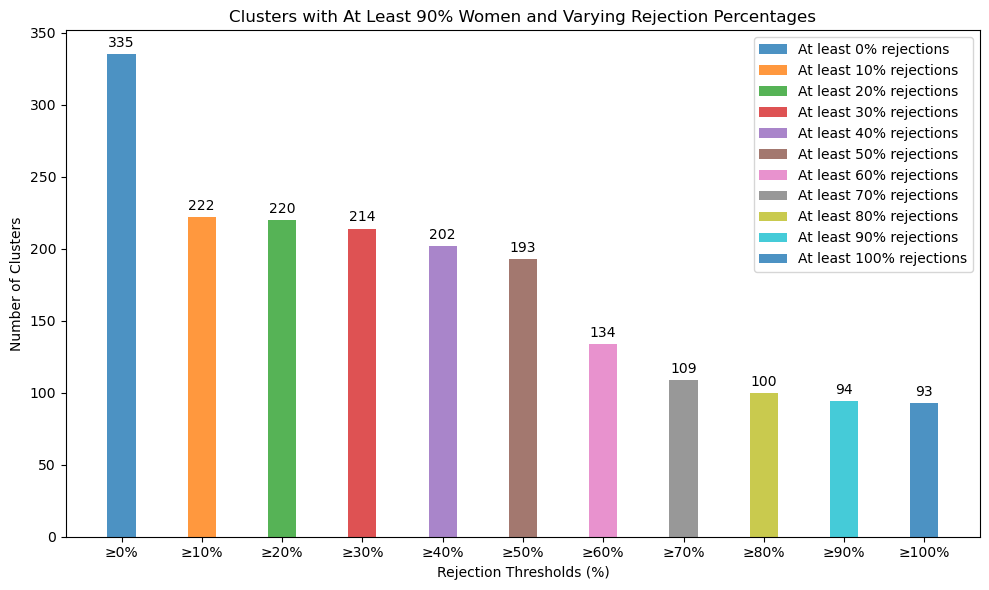

In [70]:
# Calculate the percentage of women and filter clusters with at least 40% women
min_women = 90
clusters_with_women = df_res.groupby('cluster_id').apply(
    lambda x: pd.Series({
        'percent_women': (x['one_if_male'] == 0).mean() * 100,
        'percent_rejects': (x['one_if_patented'] == 0).mean() * 100
    })
).query(f'percent_women >= {min_women}')

# Evaluate clusters based on varying rejection thresholds (10% to 100%)
rejection_thresholds = list(range(0, 101, 10))
results = {threshold: [] for threshold in rejection_thresholds}
for threshold in rejection_thresholds:
    results[threshold] = clusters_with_women[clusters_with_women['percent_rejects'] >= threshold].index.tolist()

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

bars = []
for i, threshold in enumerate(rejection_thresholds):
    bar = ax.bar(i, len(results[threshold]), bar_width, alpha=opacity, label=f'At least {threshold}% rejections')
    bars.append(bar)

ax.set_xlabel('Rejection Thresholds (%)')
ax.set_ylabel('Number of Clusters')
ax.set_title(f'Clusters with At Least {min_women}% Women and Varying Rejection Percentages')
ax.set_xticks(range(len(rejection_thresholds)))
ax.set_xticklabels([f'≥{x}%' for x in rejection_thresholds])
ax.legend()

# Adding data labels
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [72]:
round(335/861,2)

0.39

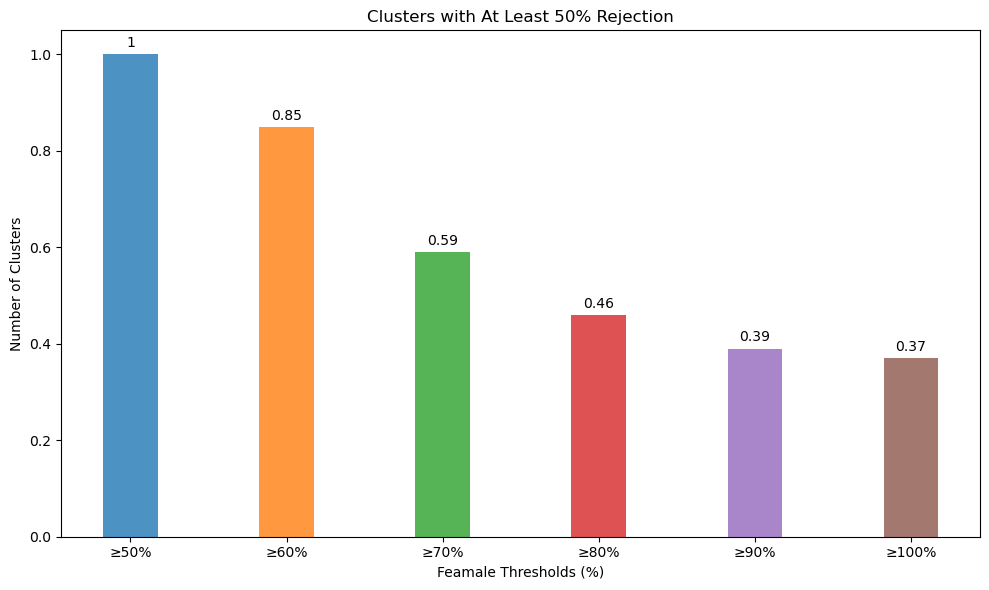

In [80]:
tatoal_val = 861
lst = {}
range_women = list(range(50, 101, 10))
for min_women in range_women:
    # Calculate the percentage of women and filter clusters with at least 40% women
    clusters_with_women = df_res.groupby('cluster_id').apply(
        lambda x: pd.Series({
            'percent_women': (x['one_if_male'] == 0).mean() * 100,
            'percent_rejects': (x['one_if_patented'] == 0).mean() * 100
        })
    ).query(f'percent_women >= {min_women}')

    # Evaluate clusters based on varying rejection thresholds (10% to 100%)
    rejection_thresholds = range_women
    results = {threshold: [] for threshold in rejection_thresholds}
    lst[min_women] = clusters_with_women[clusters_with_women['percent_rejects'] >= 0].index.tolist()

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

bars = []
for i, threshold in enumerate(range_women):
    bar = ax.bar(i, round(min(1, len(lst[threshold]) / 861), 2), bar_width, alpha=opacity, label=f'At least {threshold}% women')
    bars.append(bar)

ax.set_xlabel('Feamale Thresholds (%)')
ax.set_ylabel('Number of Clusters')
ax.set_title(f'Clusters with At Least 50% Rejection')
ax.set_xticks(range(len(range_women)))
ax.set_xticklabels([f'≥{x}%' for x in range_women])
# ax.legend()

# Adding data labels
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()